In [2]:
using Revise
using Statistics
using PrevisibilityCrawler
pc = PrevisibilityCrawler;

In [4]:
paper = papers[1];
x, y, control = loadpaper(paper);
train = 1:6000
test = 6001:size(x, 1)
signal = loadsignal(paper);
xt = x[test, :];
yt = value(y[test, :]);
controlt = control[test, :]
x = x[train, :];
y = value(y[train, :]);
control = control[train, :];

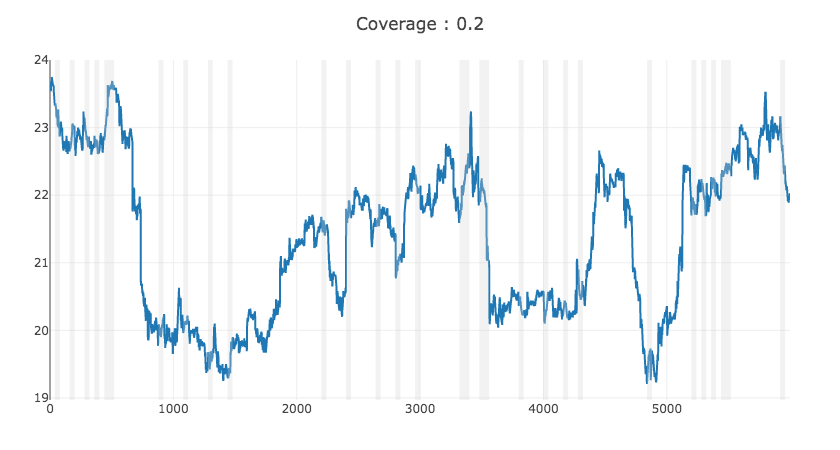

In [6]:
plotprevisibility(control.lastPrice, signal)

In [32]:
param = ["max_depth"=>5, "eta"=>1, "subsample"=>1, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round =>10));
pipef = Pipeline(model, rmae);
train!(pipef, x[1:3000, :], y[1:3000, :])
prevf = (ins = loss(pipef, x[1:3000, :], y[1:3000, :]), out = loss(pipef, x[3001:end, :], y[3001:end, :]))

(ins = 0.5891091059348607, out = 1.3211053144071867)

In [33]:
param = ["max_depth"=>5, "eta"=>1, "subsample"=>1, "objective"=>"reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round =>10));
pipef = Pipeline(model, rmae);
train!(pipef, x[1:3000, :][signal[1:3000], :], y[1:3000, :][signal[1:3000], :])
prevf = (ins = loss(pipef, x[1:3000, :][signal[1:3000], :], y[1:3000, :][signal[1:3000], :]), 
                out = loss(pipef, x[3001:end, :][signal[3001:end], :], y[3001:end, :][signal[3001:end], :]))

(ins = 0.21982730596222197, out = 1.3568333642504729)

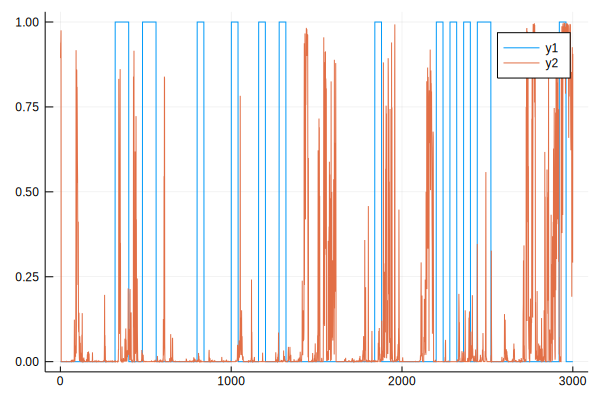

In [13]:
using XGBoost
num_round = 500
nfold = 5
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "binary:logistic"]
# res = nfold_cv(convert(Matrix, x), num_round, nfold,label=signal, param=param, metrics = ["error"]);
previsible = xgboost(convert(Matrix, x[1:3000, :]), num_round, label=signal[1:3000], param=param, silent=1);
predicted = XGBoost.predict(previsible, convert(Matrix,x[3001:end, :]))
error = xor(predicted .> )
# plt.plot([signal[3001:end],  ])

In [ ]:
using XGBoost
num_round = 500
nfold = 5
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "binary:logistic"]
# res = nfold_cv(convert(Matrix, x), num_round, nfold,label=signal, param=param, metrics = ["error"]);
previsible = xgboost(convert(Matrix, x), num_round, label=signal, param=param, silent=1);

In [9]:
prevprobs = XGBoost.predict(previsible, convert(Matrix,xt));

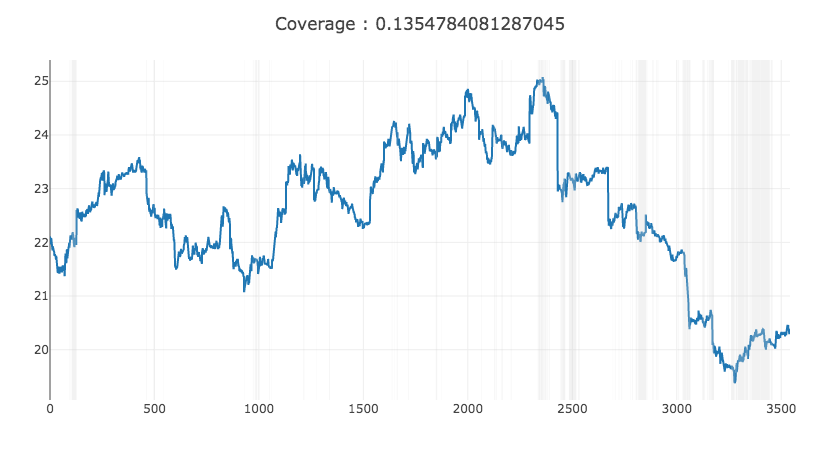

In [10]:
plotprevisibility(controlt.lastPrice, prevprobs .>= .7)

In [11]:
xp = x[signal, :];
yp = y[signal, :];
prevsignal = prevprobs .>= .7
xtp = xt[prevsignal, :];
ytp = yt[prevsignal, :];
count(yt .> 0)/length(yt), count(ytp .> 0)/length(ytp)

(0.46486028789161726, 0.4083333333333333)

In [21]:
# param = gridoptmodel(x, y, nr_rounds=50)
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round =>500));
pipef = Pipeline(model, rmae);
train!(pipef, x, y)
prevf = (ins = loss(pipef, x, y), out = loss(pipef, xt, yt))

(ins = 0.11786358595671366, out = 1.5135616174311)

In [22]:
# param = gridoptmodel(xp, yp, nr_rounds=50)
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round =>500));
pipep = Pipeline(model, rmae);
train!(pipep, xp, yp)
prevf = (ins = loss(pipep, xp, yp), out = loss(pipep, xtp, ytp,))

(ins = 0.0876297149721848, out = 1.6517061751237547)

In [23]:
mean(abs.(yt)), mean(abs.(ytp))

(0.003411395697644124, 0.0035604653974237086)

# Paper

In [24]:
paper = papers[2];
x, y, control = loadpaper(paper);
train = 1:6000
test = 6001:size(x, 1)
signal = loadsignal(paper);
xt = x[test, :];
yt = value(y[test, :]);
controlt = control[test, :]
x = x[train, :];
y = value(y[train, :]);
control = control[train, :];

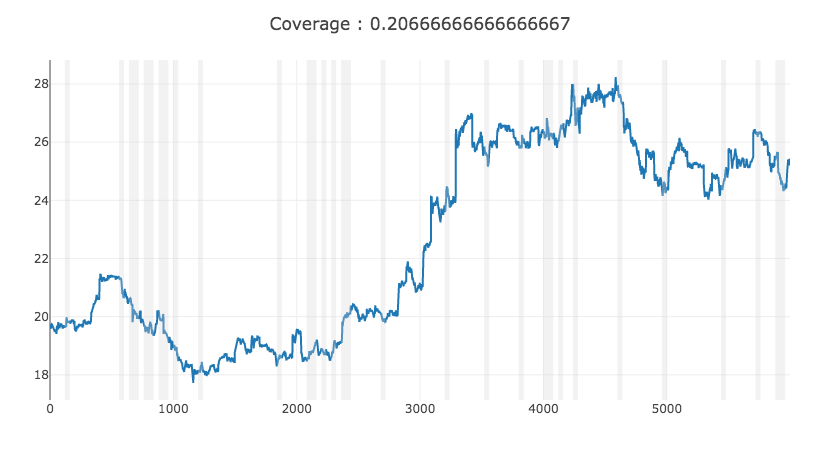

In [25]:
plotprevisibility(control.lastPrice, signal)

In [26]:
using XGBoost
num_round = 500
nfold = 5
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "binary:logistic"]
# res = nfold_cv(convert(Matrix, x), num_round, nfold,label=signal, param=param, metrics = ["error"]);
previsible = xgboost(convert(Matrix, x), num_round, label=signal, param=param, silent=1);

In [27]:
prevprobs = XGBoost.predict(previsible, convert(Matrix,xt));

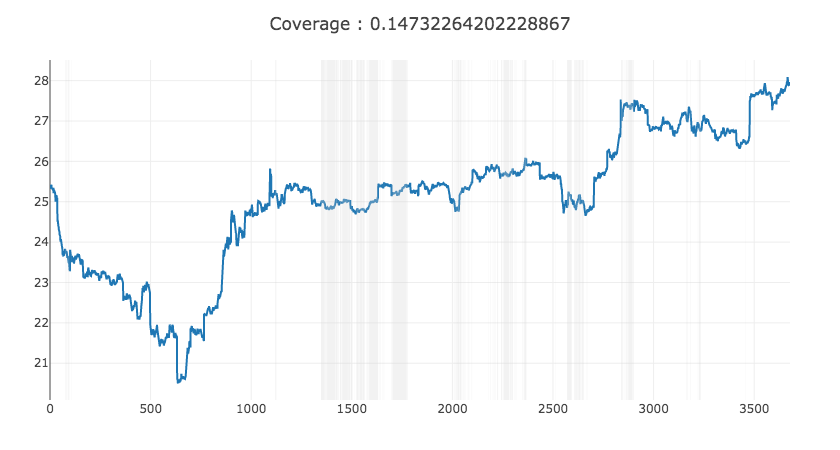

In [28]:
plotprevisibility(controlt.lastPrice, prevprobs .>= .7)

In [30]:
xp = x[signal, :];
yp = y[signal, :];
prevsignal = prevprobs .>= .7
xtp = xt[prevsignal, :];
ytp = yt[prevsignal, :];
count(yt .> 0)/length(yt), count(ytp .> 0)/length(ytp)

(0.4816526229953792, 0.466789667896679)

In [31]:
# param = gridoptmodel(x, y)
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round => 200));
pipef = Pipeline(model, rmae);
train!(pipef, x, y)
prevf = (ins = loss(pipef, x, y), out = loss(pipef, xt, yt))

(ins = 0.11925766829150442, out = 1.51608810905356)

In [32]:
# param = gridoptmodel(xp, yp)
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "reg:linear"]
model = XgBoostModel(Dict(:param => param, :nr_round => 200));
pipep = Pipeline(model, rmae);
train!(pipep, xp, yp)
prevf = (ins = loss(pipep, xp, yp), out = loss(pipep, xtp, ytp))

(ins = 0.07749077406912269, out = 2.1593547759481773)

# Paper3

In [171]:
paper = papers[3];
x, y, control = loadpaper(paper);
train = 1:6000
test = 6001:size(x, 1)
signal = loadsignal(paper);
xt = x[test, :];
yt = value(y[test, :]);
controlt = control[test, :]
x = x[train, :];
y = value(y[train, :]);
control = control[train, :];

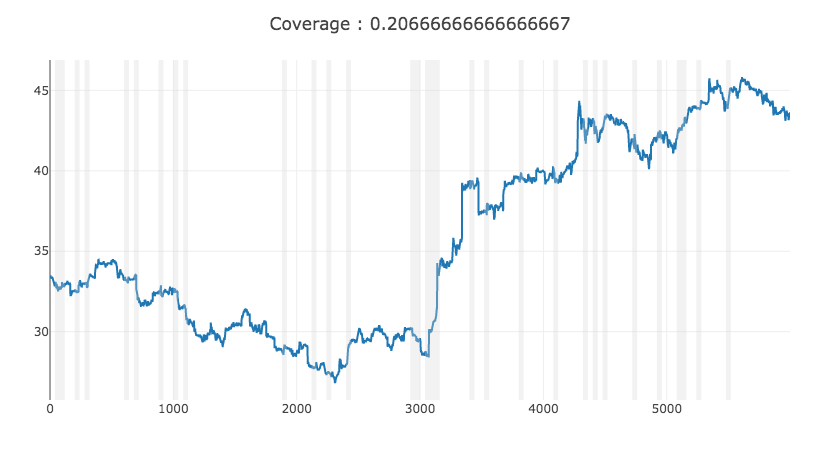

In [152]:
plotprevisibility(control.lastPrice, signal)

In [192]:
using XGBoost
num_round = 150
nfold = 5
param = ["max_depth" => 6, "eta" => .45, "subsample" => 1, "objective" => "binary:logistic"]
# res = nfold_cv(convert(Matrix, x), num_round, nfold,label=signal, param=param, metrics = ["error"]);
previsible = xgboost(convert(Matrix, x), num_round, label=signal, param=param, silent=1);

In [193]:
prevprobs = XGBoost.predict(previsible, convert(Matrix,xt));

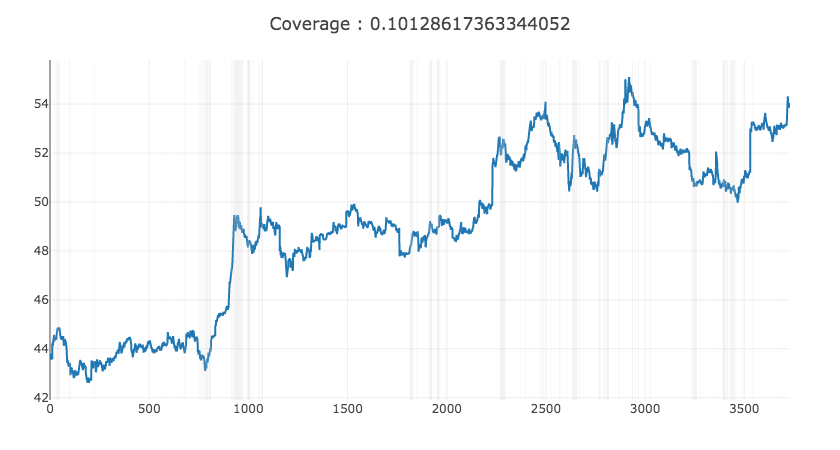

In [208]:
plotprevisibility(controlt.lastPrice, prevprobs .>= .5)

In [229]:
xp = x[signal, :];
yp = y[signal, :];
prevsignal = prevprobs .>= .5
xtp = xt[prevsignal, :];
ytp = yt[prevsignal, :];
count(yt .> 0)/length(yt), count(ytp .> 0)/length(ytp)

(0.4852625937834941, 0.47883597883597884)

In [221]:
param = gridoptmodel(x, y, nr_rounds=50)
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipef = Pipeline(model, rmae);
train!(pipef, x, y)
prevf = (ins = loss(pipef, x, y), out = loss(pipef, xt, yt))

(ins = 0.1547404135762108, out = 1.340491119949773)

In [230]:
param = gridoptmodel(xp, yp, nr_rounds=50)
model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipep = Pipeline(model, rmae);
train!(pipep, xp, yp)
prevf = (ins = loss(pipep, xp, yp), out = loss(pipep, xtp, ytp))

(ins = 0.10265363105953489, out = 1.2832663763600327)

In [210]:
xp = x[signal, :];
yp = y[signal, :];
prevsignal = prevprobs .>= .5
xtp = xt[prevsignal, :];
ytp = yt[prevsignal, :];
count(yt .> 0)/length(yt), count(ytp .> 0)/length(ytp)

(0.4852625937834941, 0.47883597883597884)

In [219]:
param = ["max_depth" => 6, "eta" => .8, "subsample" => 1, "objective" => "reg:linear"]

model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
crossvalidation!(pipe, xt, yt)

(0.12191553204630798, 0.9681315548443857)

In [220]:
param = ["max_depth" => 4, "eta" => .8, "subsample" => 1, "objective" => "reg:linear"]

model = XgBoostModel(Dict(:param => param, :nr_round => 500));
pipe = Pipeline(model, rmae);
crossvalidation!(pipe, xtp, ytp)

(0.08509331892202383, 1.0490780330306329)

In [213]:
param = ["max_depth" => 5, "eta" => .8, "subsample" => 1, "objective" => "reg:linear"]
nfold_cv(convert(Matrix, x), 200, 5,label=y, param=param, metric=[]);

MethodError: MethodError: no method matching (::getfield(XGBoost, Symbol("#_setinfo#8")))(::Ptr{Nothing}, ::String, ::Array{Float64,2})
Closest candidates are:
  _setinfo(::Ptr{Nothing}, ::String, !Matched::Array{#s12,1} where #s12<:Number) at /opt/julia/packages/XGBoost/mGC3j/src/xgboost_lib.jl:8